## Census Income Mini Project 3

The dataset I'm using can be found here: https://www.kaggle.com/datasets/uciml/adult-census-income/data

Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

Listing of attributes:

income (target): >50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt (fnlwgt: final weight. In other words, this is the number of people the census believes): continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('adult.csv')

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## EDA

In [3]:
df = df.rename(columns={'education.num': 'education_num',
                        'marital.status': 'marital_status', 
                        'capital.gain': 'capital_gain', 
                        'capital.loss': 'capital_loss', 
                        'hours.per.week': 'hours_per_week', 
                        'native.country': 'native_country'})

In [4]:
df.shape

(32561, 15)

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

I note that '?' seems to represent missing data and will need to be dealt with

In [8]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [9]:
df.marital_status.value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [10]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

I note again that I will need to deal with the '?' values

In [11]:
df.relationship.value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [12]:
df.race.value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [13]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [14]:
df.native_country.value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

I note the '?' values

In [15]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

Somewhat unbalanced. May need to use SMOTE and over sample

In [16]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [17]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


From the kaggle page, the fnlwgt is the (estimated) number of people each row in the data represents. I'm not planning on using it so I will drop it

In [19]:
df = df.drop(['fnlwgt'], axis=1)

Education level has also already been represented numerically with the education_num column, therefore I will drop 'education'

In [20]:
df = df.drop(['education'], axis=1)

**Fixing null values**

I'm going to try writing a function which will iterate through numerical columns and fill with median, and also through columns with object type, and use a classifier to fill in null values (and we can specify a string which represents a null value like '?' in our dataset)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

def fill_missing_with_classifier(df, null_string=None):
    """This function takes a dataframe and a string that represents null values (if present in the data) and fills in numerical values with the median, 
    and categorical values using a classifier to hopefully return better results than simply using the mode"""
    
    # Replace the specified null string with NaN
    df = df.replace(null_string, np.nan)

    # Impute missing values in numerical columns
    num_imputer = SimpleImputer(strategy='median')
    df[df.select_dtypes(include=[np.number]).columns] = num_imputer.fit_transform(df.select_dtypes(include=[np.number]))

    for column in df.select_dtypes(include=['object']).columns:
        # Separate the DataFrame into features and target
        X = df.select_dtypes(include=[np.number])  # Only numerical columns
        y = df[column]

        # Check if the column has missing values
        if y.isnull().sum() > 0:
            # Train a classifier
            classifier = RandomForestClassifier()
            classifier.fit(X[y.notnull()], y[y.notnull()])

            # Predict and fill missing values
            y_pred = classifier.predict(X[y.isnull()])
            df.loc[y.isnull(), column] = y_pred

    return df


In [22]:
df = fill_missing_with_classifier(df, '?')

In [23]:
df.native_country.value_counts()

United-States                 29733
Mexico                          655
Philippines                     200
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     108
India                           100
Cuba                             95
England                          90
Jamaica                          82
South                            81
China                            76
Italy                            73
Dominican-Republic               71
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

**Now to encode the categories**

In [24]:
from sklearn import preprocessing

categorical = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
for feature in categorical:
    le = preprocessing.LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

In [25]:
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90.0,3,9.0,6,7,1,4,0,0.0,4356.0,40.0,38,<=50K
1,82.0,3,9.0,6,3,1,4,0,0.0,4356.0,18.0,38,<=50K
2,66.0,0,10.0,6,3,4,2,0,0.0,4356.0,40.0,38,<=50K
3,54.0,3,4.0,0,6,4,4,0,0.0,3900.0,40.0,38,<=50K
4,41.0,3,10.0,5,9,3,4,0,0.0,3900.0,40.0,38,<=50K


**Scaling data**

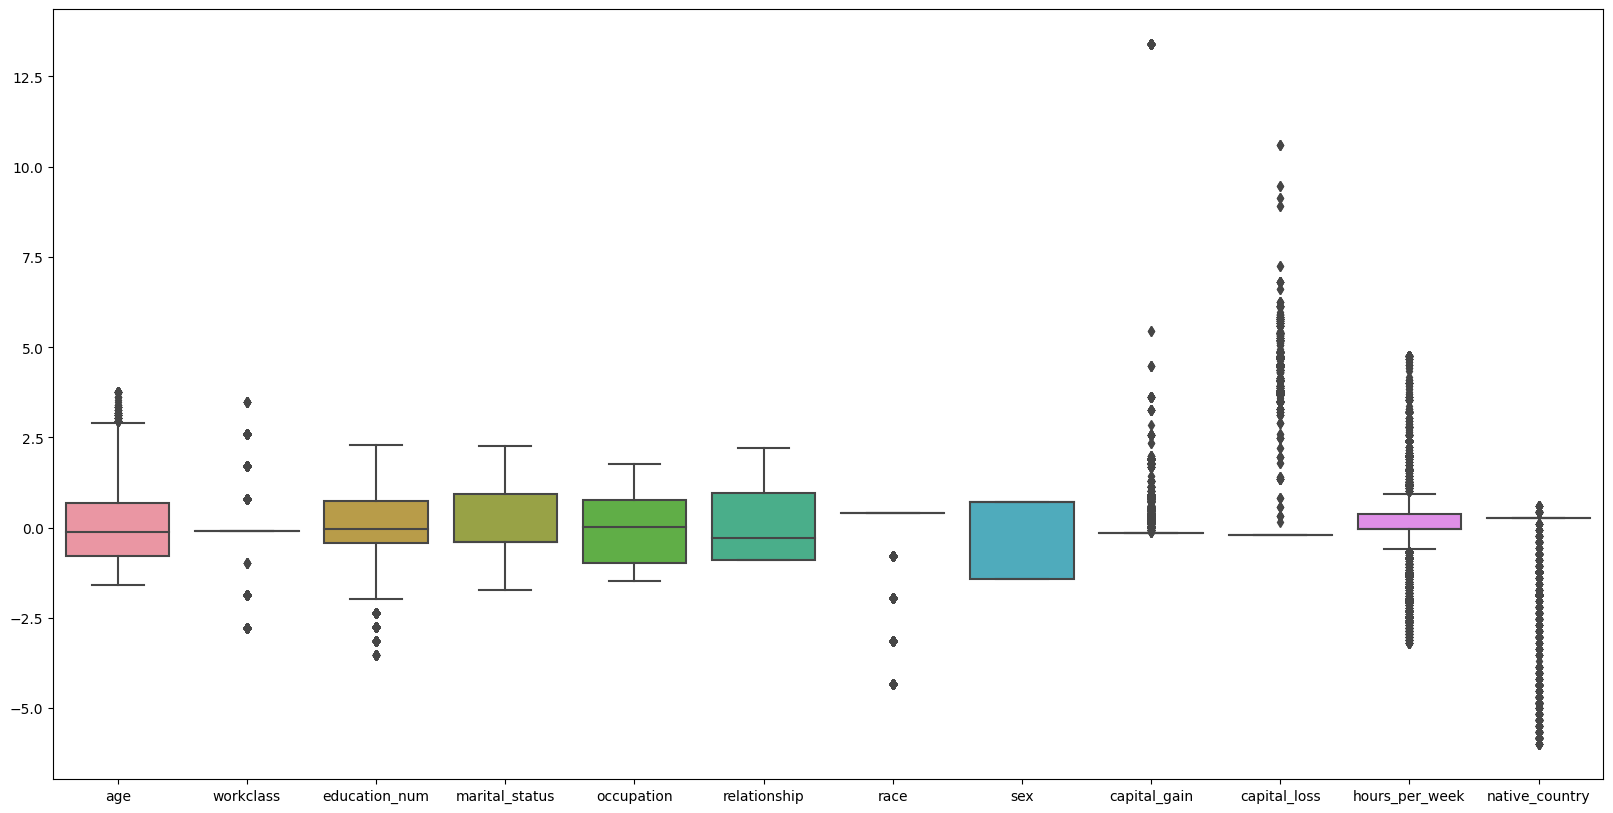

In [26]:
from sklearn.preprocessing import StandardScaler

#The XGBoost did not like the string categories, so I'm replacing them with 0 and 1
df['income'] = df['income'].map({'>50K': 1, '<=50K': 0})

X = df.drop('income',axis=1)
y = df['income']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

plt.figure(figsize=(20, 10))
sns.boxplot(data=X_scaled)
plt.show()

Intially it looks like the capital gain/loss columns have outliers that need to be fixed, but it makes sense that the large majority of people have 0 capital gain or capital loss, but there might be a few with large values instead. Therefore I don't think these should be considered outliers.

No other outliers need to be dealt with.

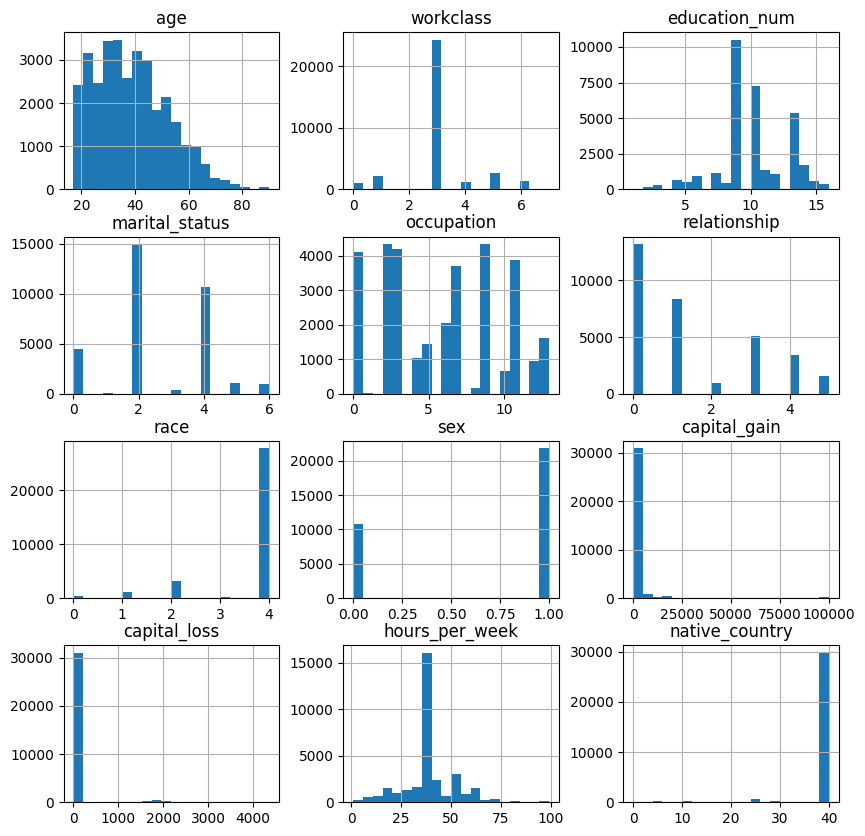

In [27]:
X.hist(bins=20,figsize=(10,10))
plt.show()

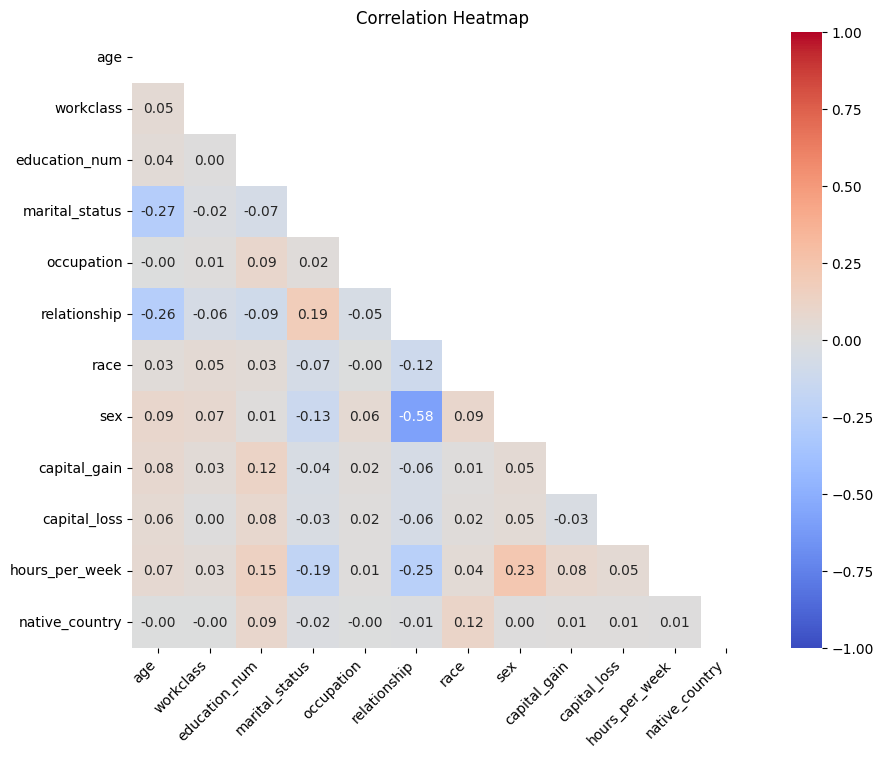

In [28]:
corr_matrix = X_scaled.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap')

plt.show()

No obvious multicollinearity that might need to be dealt with

## Modelling

In [29]:
from sklearn.model_selection import train_test_split

## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

ada_clf = AdaBoostClassifier()
grad_clf = GradientBoostingClassifier()
xgb_clf = xgb.XGBClassifier()

# Fit the classifiers
ada_clf.fit(X_train, y_train)
grad_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Ada Performance
y_pred = ada_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)

print("Ada Accuracy: ", accuracy)
print(cm)

#Gradient Boost Performance
y_pred = grad_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)

print("Gradient Accuracy: ", accuracy)
print(cm)

#XGBoost Performance
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)

print("XGB Accuracy: ", accuracy)
print(cm)

Ada Accuracy:  0.857976354982343
[[4705  271]
 [ 654  883]]
Gradient Accuracy:  0.8644249961615231
[[4735  241]
 [ 642  895]]
XGB Accuracy:  0.8717948717948718
[[4682  294]
 [ 541  996]]


Base performance is good, but let's see if we can perform better if we tune the hyper parameters

In [32]:
# Define classifiers
ada_clf = AdaBoostClassifier()
grad_clf = GradientBoostingClassifier()
xgb_clf = xgb.XGBClassifier()

# Define parameter grids
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

grad_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 4, 5]
}

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 4, 5]
}

In [33]:
from sklearn.model_selection import GridSearchCV

# AdaBoost
ada_grid_search = GridSearchCV(ada_clf, ada_param_grid, cv=5, scoring='accuracy')
ada_grid_search.fit(X_train, y_train)
best_ada = ada_grid_search.best_estimator_
best_score = ada_grid_search.best_score_

print("Best parameters for AdaBoost:", ada_grid_search.best_params_)
print("Best AdaBoost Score:", best_score)

# Gradient Boosting
grad_grid_search = GridSearchCV(grad_clf, grad_param_grid, cv=5, scoring='accuracy')
grad_grid_search.fit(X_train, y_train)
best_grad = grad_grid_search.best_estimator_
best_score = grad_grid_search.best_score_

print("Best parameters for Gradient Boosting:", grad_grid_search.best_params_)
print("Best Gradient Boosting Score:", best_score)

# XGBoost
xgb_grid_search = GridSearchCV(xgb_clf, xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)
best_xgb = xgb_grid_search.best_estimator_
best_score = xgb_grid_search.best_score_

print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best XGBoost Score:", best_score)


Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 200}
Best AdaBoost Score: 0.8644041594921532
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Gradient Boosting Score: 0.8731957423461314
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best XGBoost Score: 0.8726198971291751


Minor improvements for both Ada and Gradient models

**Now attempting to use a basic stacking model to compare performance**

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import StackingClassifier

base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('lr', LogisticRegression()),
    ('gnb', GaussianNB()),
    ('knn', KNeighborsClassifier())
]

stack_clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

stack_clf.fit(X_train, y_train)
#np.ascontiguousarray(X_train)


StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('lr', LogisticRegression()),
                               ('gnb', GaussianNB()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = stack_clf.predict(X_test)
#np.ascontiguousarray(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)

print("Accuracy: ", accuracy)
print(cm)

Accuracy:  0.8513741747274681
[[4663  313]
 [ 655  882]]


I will attempt to use GridSearchCV to optimise the stacking classifier

In [37]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'lr__C': [0.1, 1.0, 10.0],
    'knn__n_neighbors': [3, 5, 7],
    'final_estimator__C': [0.1, 1.0, 10.0]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=stack_clf, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=5, 
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)


# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'final_estimator__C': 0.1, 'knn__n_neighbors': 7, 'lr__C': 1.0, 'rf__n_estimators': 50}
Best score: 0.8546142970475211


In [38]:
best_stk = grid_search.best_estimator_

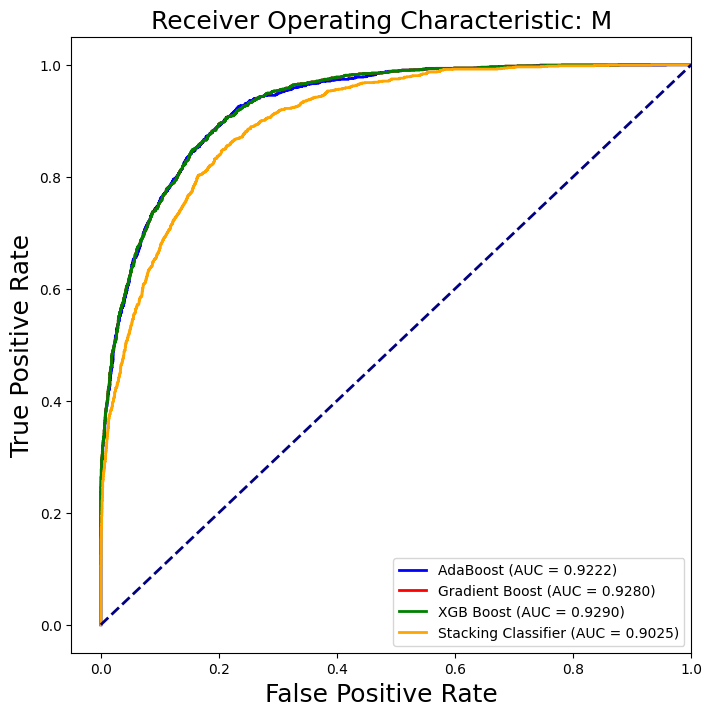

In [41]:
from sklearn.metrics import roc_curve, auc

y_scores_ada = best_ada.predict_proba(X_test)[:, 1]
y_scores_grad = best_grad.predict_proba(X_test)[:, 1]
y_scores_xgb = best_xgb.predict_proba(X_test)[:, 1]
y_scores_stk = best_stk.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_scores_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

fpr_grad, tpr_grad, _ = roc_curve(y_test, y_scores_grad)
roc_auc_grad = auc(fpr_grad, tpr_grad)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_scores_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_stk, tpr_stk, _ = roc_curve(y_test, y_scores_stk)
roc_auc_stk = auc(fpr_stk, tpr_stk)

#plot
plt.figure(figsize=[8,8])

plt.plot(fpr_grad, tpr_grad, color='blue', lw=2, label='AdaBoost (AUC = %0.4f)' % roc_auc_ada)
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label='Gradient Boost (AUC = %0.4f)' % roc_auc_grad)
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label='XGB Boost (AUC = %0.4f)' % roc_auc_xgb)
plt.plot(fpr_stk, tpr_stk, color='orange', lw=2, label='Stacking Classifier (AUC = %0.4f)' % roc_auc_stk)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Plot the random guess line

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()